In [1]:
#!pip install ultralytics

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#from ultralytics import SAM

# Load a model
#model = SAM("sam2.1_b.pt")

In [4]:
#model("/content/drive/MyDrive/daler_30.01", show = True, save = True, save_txt=True)

In [5]:
# Run inference
#model("/content/drive/MyDrive/daler_30.01", show = True, save = True)

In [6]:


#import shutil

# Создаём ZIP-архив папки
#shutil.make_archive("/content/runs/segment/predict5", 'zip', "/content/runs/segment/predict5")



In [ ]:
import json
import math

coef = 0.69

with open('/content/09B72D89-816B-46E5-8D78-DD8DA89FD753_1_201_a.json', 'r') as file:
    data = json.load(file)

# Переменные для суммирования ширин и высот
total_width = 0
total_height = 0
count = 0

# Обработка каждого bounding box
for shape in data.get("shapes", []):
    points = shape.get("points", [])
    if len(points) == 2:  # Проверяем, что указаны две точки
        x1, y1 = points[0]
        x2, y2 = points[1]

        width = abs(x2 - x1)
        height = abs(y2 - y1)

        total_width += width
        total_height += height
        count += 1

# Вычисление среднего размера
if count > 0:
    avg_width = total_width / count
    avg_height = total_height / count

    # Умножение средних размеров на коэффициент
    scaled_avg_width = avg_width * coef
    scaled_avg_height = avg_height * coef

    # Вычисление b и a
    b = scaled_avg_height / 2
    a = scaled_avg_width / 2

    # Вычисление эксцентриситета
    if a > b:  # Условие для корректного расчета
        eccentricity = math.sqrt(1 - (b**2 / a**2))
        eccentricity_output = f"Эксцентриситет: {eccentricity:.4f}"
    else:
        eccentricity_output = "Ошибка: a должно быть больше b для корректного расчета эксцентриситета."

    print(f"Средняя ширина: {avg_width:.2f}, после умножения на коэффициент: {scaled_avg_width:.2f} нм")
    print(f"Средняя высота: {avg_height:.2f}, после умножения на коэффициент: {scaled_avg_height:.2f} нм")
    print(f"b (полуось по ширине): {b:.2f}")
    print(f"a (полуось по высоте): {a:.2f}")
    print(eccentricity_output)
else:
    print("Bounding box не найдены в файле.")




Средняя ширина: 89.63, после умножения на коэффициент: 61.85 нм
Средняя высота: 86.76, после умножения на коэффициент: 59.87 нм
b (полуось по ширине): 29.93
a (полуось по высоте): 30.92
Эксцентриситет: 0.2511


# Для работы с json coco форматом с roboflow

Количество bounding box'ов: 358
Средняя ширина: 30.48, после умножения на коэффициент: 32.61 нм
Средняя высота: 28.72, после умножения на коэффициент: 30.73 нм
Средний b: 15.37
Средний a: 16.31
Эксцентриситет: 0.3346
Степень заполнения изображения bounding box'ами: 21.16%


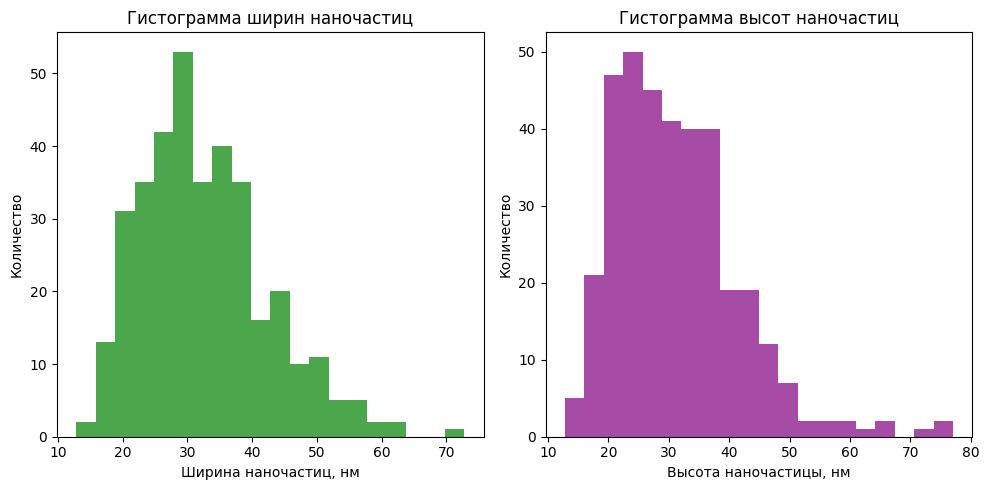

In [ ]:
import json
import math
import matplotlib.pyplot as plt

coef = 1.07

with open('/content/_annotations.coco.json', 'r') as file:
    data = json.load(file)

# Переменные для суммирования ширин, высот и площадей
total_width = 0
total_height = 0
total_area = 0
count = 0
scaled_widths = []
scaled_heights = []

# Получаем размеры изображения
image_info = data.get("images", [])[0]  # Предполагаем, что изображение одно
image_width = image_info.get("width", 1)
image_height = image_info.get("height", 1)
image_area = image_width * image_height

# Обработка каждого bounding box
for annotation in data.get("annotations", []):
    x, y, width, height = annotation.get("bbox", [0, 0, 0, 0])
    total_width += width
    total_height += height
    total_area += width * height
    scaled_widths.append(width * coef)
    scaled_heights.append(height * coef)
    count += 1

# Вычисление среднего размера
if count > 0:
    avg_width = total_width / count
    avg_height = total_height / count

    # Умножение средних размеров на коэффициент
    scaled_avg_width = avg_width * coef
    scaled_avg_height = avg_height * coef

    # Вычисление b и a
    b = scaled_avg_height / 2
    a = scaled_avg_width / 2

    # Вычисление эксцентриситета
    if a > b:
        eccentricity = math.sqrt(1 - (b**2 / a**2))
        eccentricity_output = f"Эксцентриситет: {eccentricity:.4f}"
    else:
        eccentricity_output = "Ошибка: a должно быть больше b для корректного расчета эксцентриситета."

    # Вычисление степени заполнения изображения
    fill_ratio = (total_area / image_area) * 100

    print(f"Количество bounding box'ов: {count}")
    print(f"Средняя ширина: {avg_width:.2f}, после умножения на коэффициент: {scaled_avg_width:.2f} нм")
    print(f"Средняя высота: {avg_height:.2f}, после умножения на коэффициент: {scaled_avg_height:.2f} нм")
    print(f"Средний b: {b:.2f}")
    print(f"Средний a: {a:.2f}")
    print(eccentricity_output)
    print(f"Степень заполнения изображения bounding box'ами: {fill_ratio:.2f}%")

    # Построение гистограмм после умножения на коэффициент
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.hist(scaled_widths, bins=20, color='green', alpha=0.7)
    plt.xlabel('Ширина наночастиц, нм')
    plt.ylabel('Количество')
    plt.title('Гистограмма ширин наночастиц')

    plt.subplot(1, 2, 2)
    plt.hist(scaled_heights, bins=20, color='purple', alpha=0.7)
    plt.xlabel('Высота наночастицы, нм')
    plt.ylabel('Количество')
    plt.title('Гистограмма высот наночастиц')

    plt.tight_layout()
    plt.show()
else:
    print("Bounding box не найдены в файле.")


# Вывод результатов
1) Количество масок: 162
2) Средняя ширина маски: 80.03 нм
3) Средняя высота маски: 76.55 нм
4) Средняя большая ось: 85.00 нм
5) Средняя малая ось: 71.58 нм
6) Средний эксцентриситет: 0.440
7) Суммарная площадь заполнения масками относительно всего изображения: 32.674%
8) Плотность частиц на нм²: 0.000048 частиц/нм²


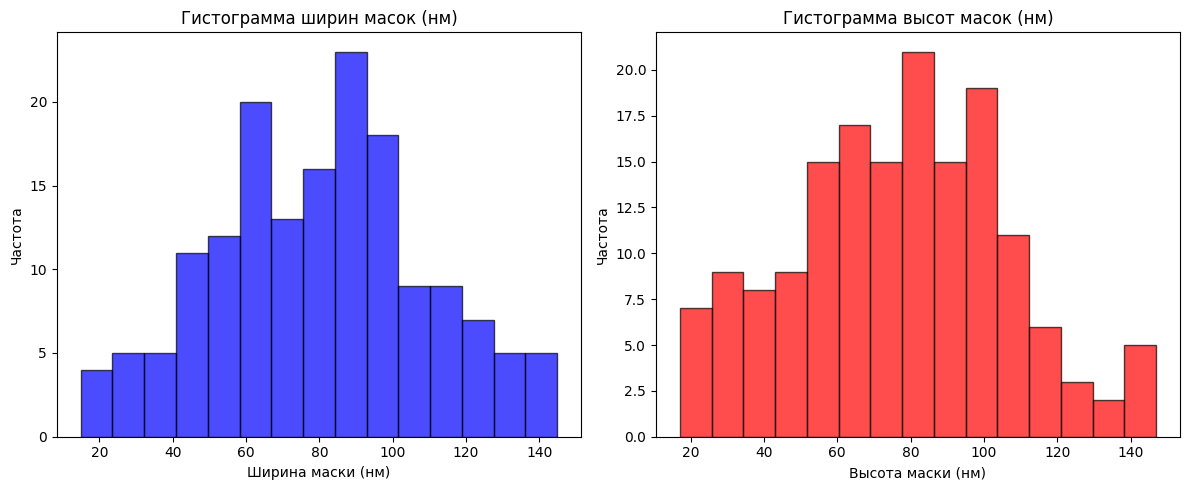

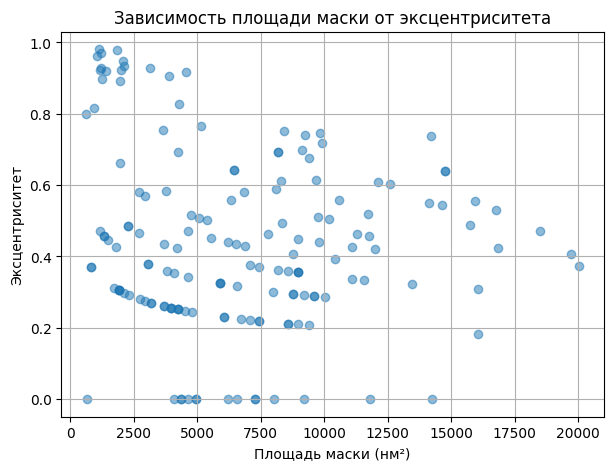

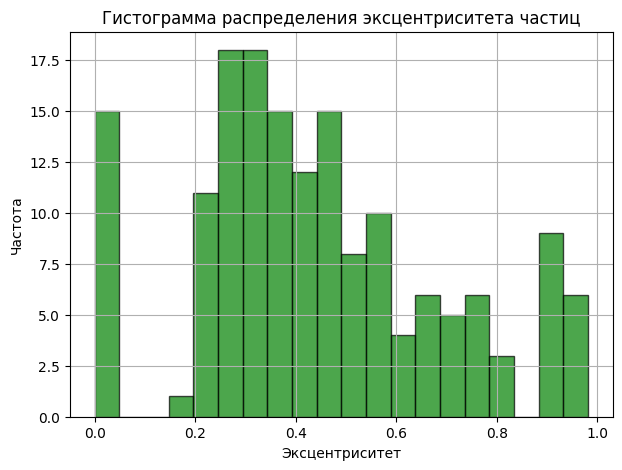

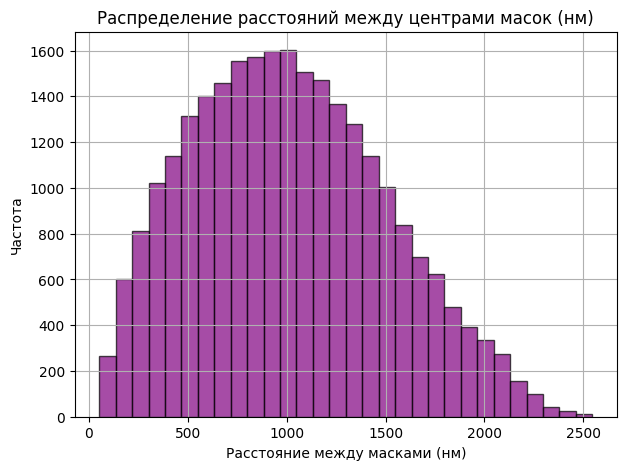

In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

import cv2
import matplotlib.patches as patches

json_path = "/content/Ag_D02_jpg.rf.43291e74974000845ec926a9640276c5.json"
with open(json_path, "r") as f:
    data = json.load(f)



# Коэффициент пересчета пикселей в нанометры
nm_per_pixel = 2.13

# Извлекаем размеры изображения
image_width_nm = data["image"]["width"] * nm_per_pixel
image_height_nm = data["image"]["height"] * nm_per_pixel

# Извлекаем bounding boxes и площади
masks = data["annotations"]
num_masks = len(masks)


widths_nm = [mask["bbox"][2] * nm_per_pixel for mask in masks]
heights_nm = [mask["bbox"][3] * nm_per_pixel for mask in masks]
areas_nm2 = [mask["area"] * (nm_per_pixel**2) for mask in masks]

# Средние значения
mean_width_nm = np.mean(widths_nm)
mean_height_nm = np.mean(heights_nm)

# Оценка малой и большой оси, эксцентриситета
minor_axes_nm = []
major_axes_nm = []
eccentricities = []

for mask in masks:
    width_nm, height_nm = mask["bbox"][2] * nm_per_pixel, mask["bbox"][3] * nm_per_pixel
    major_axis_nm = max(width_nm, height_nm)
    minor_axis_nm = min(width_nm, height_nm)
    eccentricity = np.sqrt(1 - (minor_axis_nm**2 / major_axis_nm**2)) if major_axis_nm > 0 else 0

    major_axes_nm.append(major_axis_nm)
    minor_axes_nm.append(minor_axis_nm)
    eccentricities.append(eccentricity)

mean_major_axis_nm = np.mean(major_axes_nm)
mean_minor_axis_nm = np.mean(minor_axes_nm)
mean_eccentricity = np.mean(eccentricities)

# Суммарная площадь заполнения
total_mask_area_nm2 = sum(areas_nm2)
total_image_area_nm2 = image_width_nm * image_height_nm
fill_ratio = total_mask_area_nm2 / total_image_area_nm2

# Распределение расстояний между центрами масок
centroids_nm = [(mask["bbox"][0] * nm_per_pixel + mask["bbox"][2] * nm_per_pixel / 2,
                 mask["bbox"][1] * nm_per_pixel + mask["bbox"][3] * nm_per_pixel / 2) for mask in masks]

distance_matrix_nm = cdist(centroids_nm, centroids_nm)
np.fill_diagonal(distance_matrix_nm, np.inf)  # Исключаем нулевые расстояния до самого себя

# Получаем плоский массив расстояний, исключая бесконечности
distances_nm = distance_matrix_nm[distance_matrix_nm != np.inf]


# Вычисляем плотность частиц (масок) на нм²
particle_density = num_masks / total_image_area_nm2



print("# Вывод результатов")
print(f"1) Количество масок: {num_masks}")
print(f"2) Средняя ширина маски: {mean_width_nm:.2f} нм")
print(f"3) Средняя высота маски: {mean_height_nm:.2f} нм")
print(f"4) Средняя большая ось: {mean_major_axis_nm:.2f} нм")
print(f"5) Средняя малая ось: {mean_minor_axis_nm:.2f} нм")
print(f"6) Средний эксцентриситет: {mean_eccentricity:.3f}")
print(f"7) Суммарная площадь заполнения масками относительно всего изображения: {fill_ratio:.3%}")
print(f"8) Плотность частиц на нм²: {particle_density:.6f} частиц/нм²")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(widths_nm, bins=15, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Ширина маски (нм)")
plt.ylabel("Частота")
plt.title("Гистограмма ширин масок (нм)")

plt.subplot(1, 2, 2)
plt.hist(heights_nm, bins=15, color="red", alpha=0.7, edgecolor="black")
plt.xlabel("Высота маски (нм)")
plt.ylabel("Частота")
plt.title("Гистограмма высот масок (нм)")

plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(areas_nm2, eccentricities, alpha=0.5)
plt.xlabel("Площадь маски (нм²)")
plt.ylabel("Эксцентриситет")
plt.title("Зависимость площади маски от эксцентриситета")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
plt.hist(eccentricities, bins=20, color="green", alpha=0.7, edgecolor="black")
plt.xlabel("Эксцентриситет")
plt.ylabel("Частота")
plt.title("Гистограмма распределения эксцентриситета частиц")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
plt.hist(distances_nm, bins=30, color="purple", alpha=0.7, edgecolor="black")
plt.xlabel("Расстояние между масками (нм)")
plt.ylabel("Частота")
plt.title("Распределение расстояний между центрами масок (нм)")
plt.grid(True)
plt.show()



Чем выше значение на оси Y для какого-то значения X (расстояния), тем чаще встречаются частицы на таком расстоянии друг от друга.


Если пик гистограммы находится, например, в районе 1000 нм, это значит, что большинство частиц имеют соседей на расстоянии около 1000 нм.



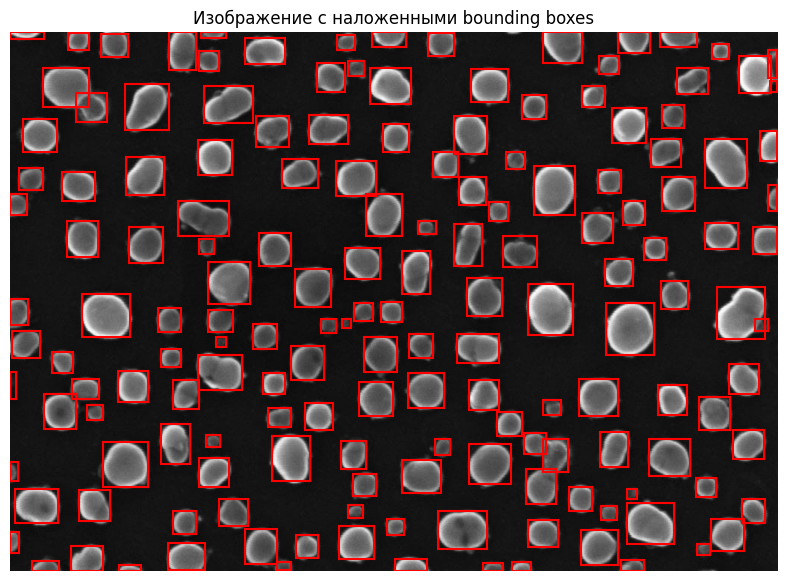

In [2]:
import cv2
import matplotlib.patches as patches

image_path = "/content/Ag_D02_jpg.rf.43291e74974000845ec926a9640276c5.jpg"

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(image)

for mask in masks:
    x, y, w, h = mask["bbox"]
    rect = patches.Rectangle((x, y), w, h, linewidth=1.5, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

ax.set_title("Изображение с наложенными bounding boxes")
plt.axis("off")
plt.show()
